In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.value_counts()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# EDA

Text(0.5, 1.0, 'Correlation')

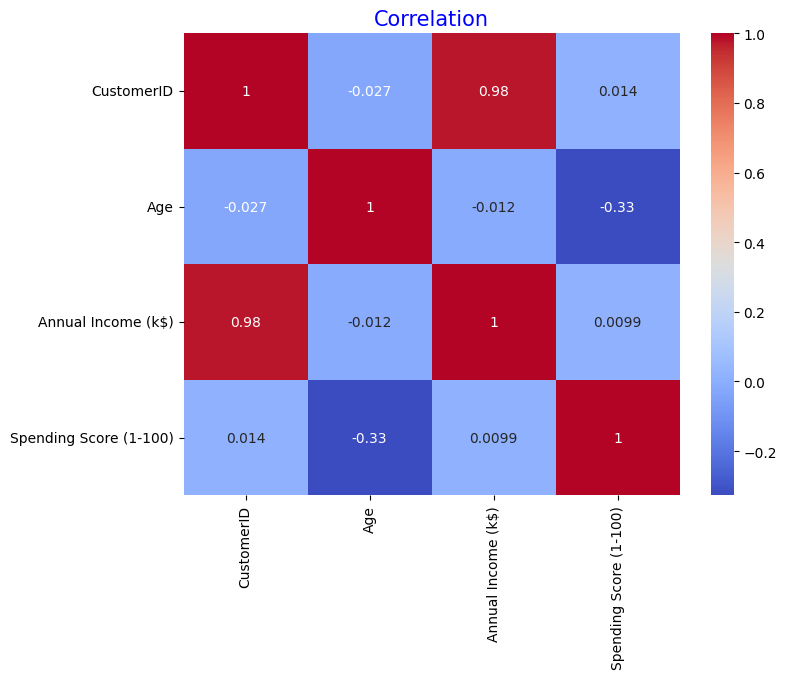

In [ ]:
#correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True, cmap= "coolwarm")
plt.title('Correlation', fontsize= 15, loc= 'center', color= 'b')

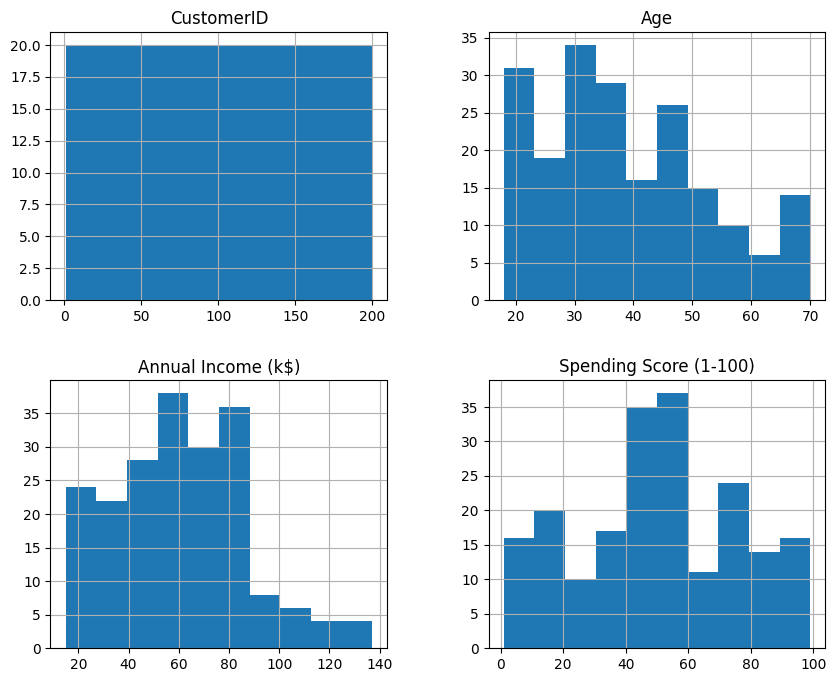

In [ ]:
df.hist(figsize=(10,8))
plt.show()

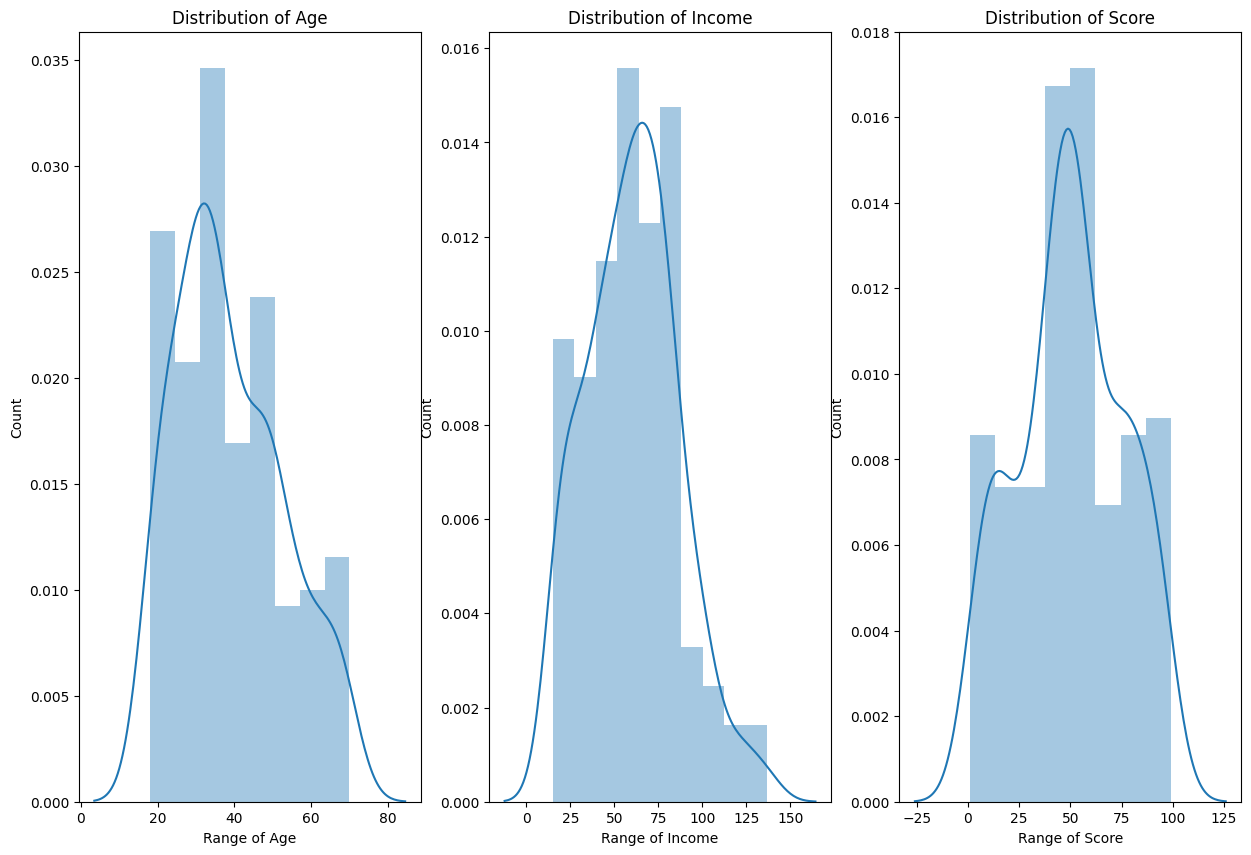

In [ ]:
plt.figure(figsize= (15,10))

plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Income')
plt.xlabel('Range of Income')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Score')
plt.xlabel('Range of Score')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

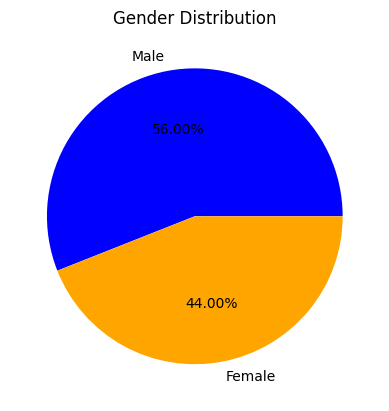

In [ ]:
pc = df.groupby('Gender').size()
pc.plot(kind= 'pie', subplots= True, colors= ['blue', 'orange'], explode= [0,0.001], labels= ['Male', 'Female'], autopct= '%.2f%%')
plt.title("Gender Distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

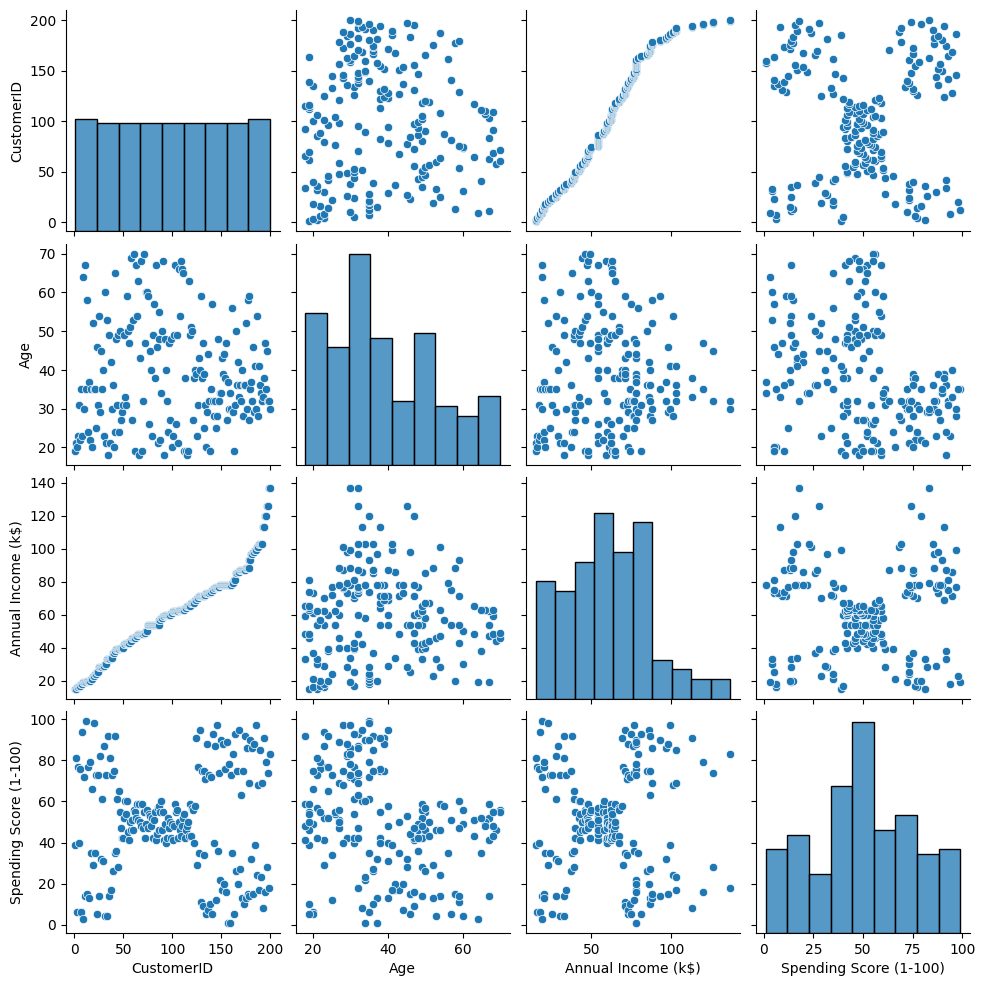

In [ ]:
sns.pairplot(df)
plt.show

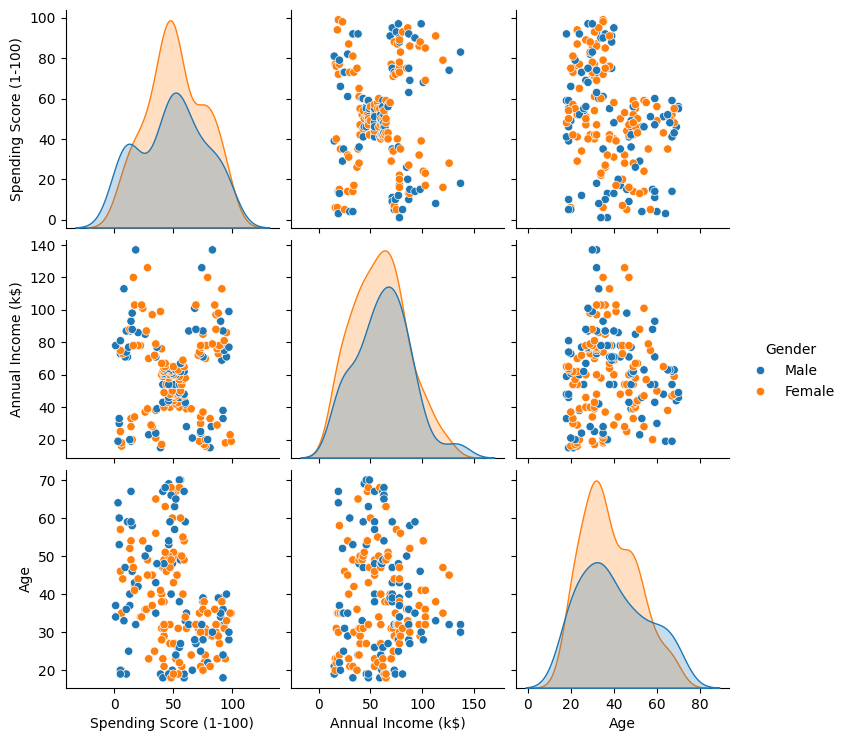

In [ ]:
sns.pairplot(df, vars= ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue= 'Gender')

Text(0.5, 1.0, 'Distribution of Age')

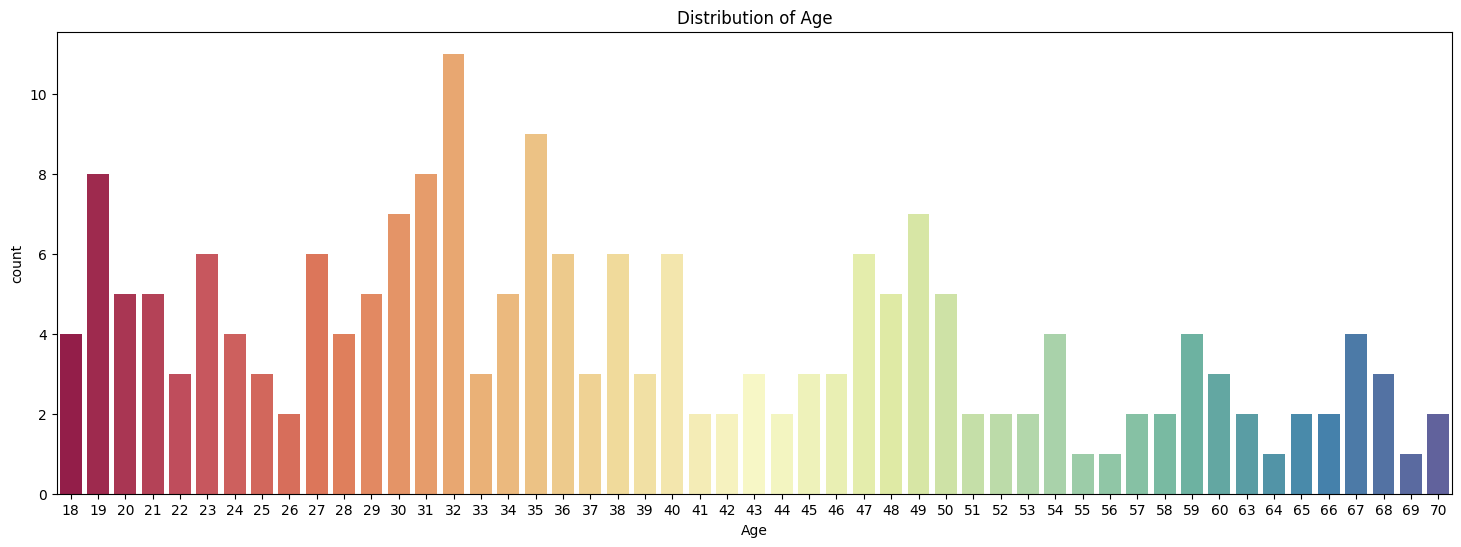

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Age', data=df, palette='Spectral')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

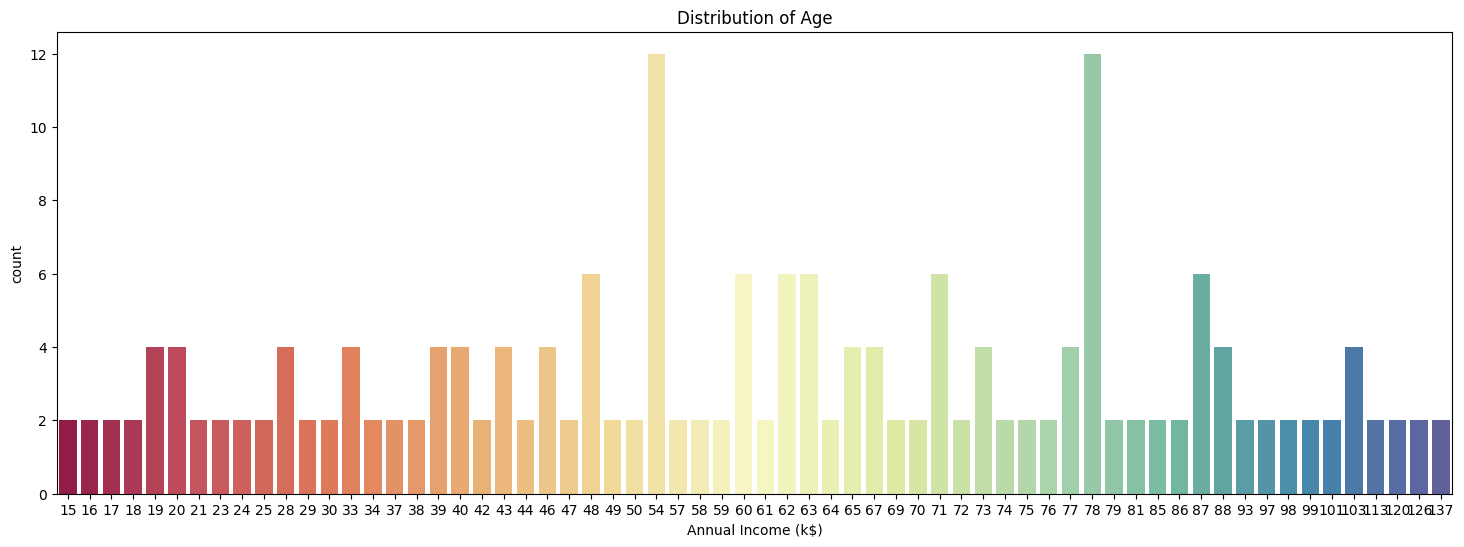

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Annual Income (k$)', data=df, palette='Spectral')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age')

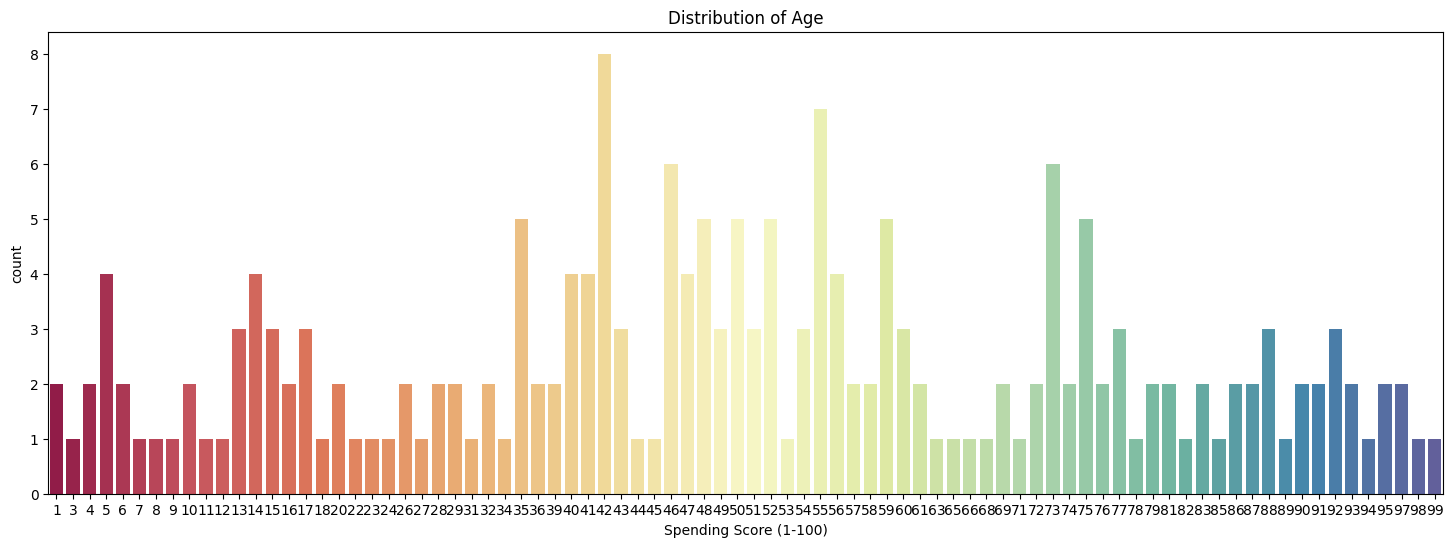

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Spending Score (1-100)', data=df, palette='Spectral')
plt.title('Distribution of Age')

In [ ]:
!pip install dabl
import dabl

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.57E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

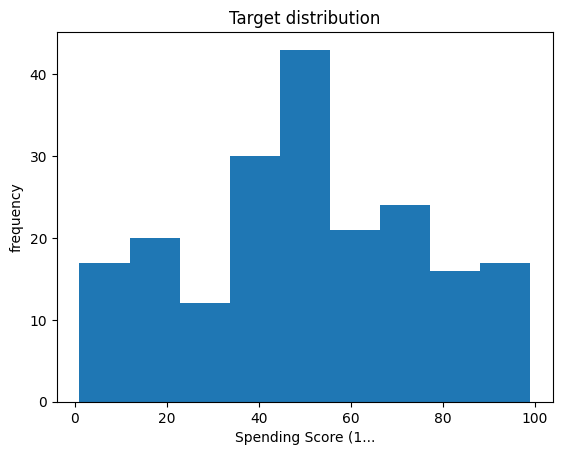

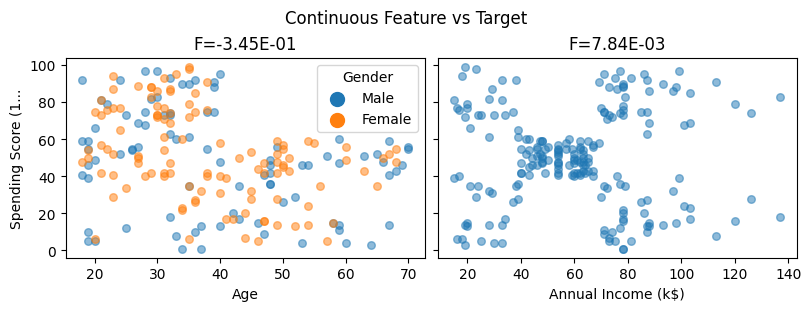

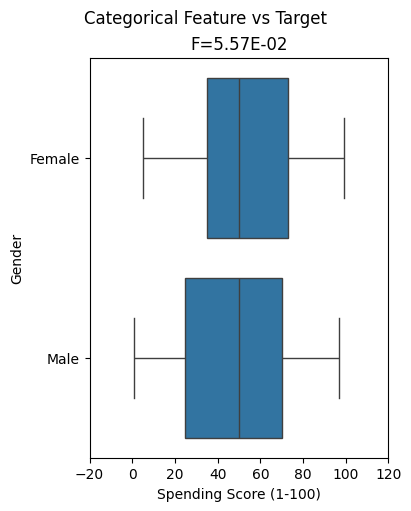

In [ ]:
dabl.plot(df, target_col= 'Spending Score (1-100)')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

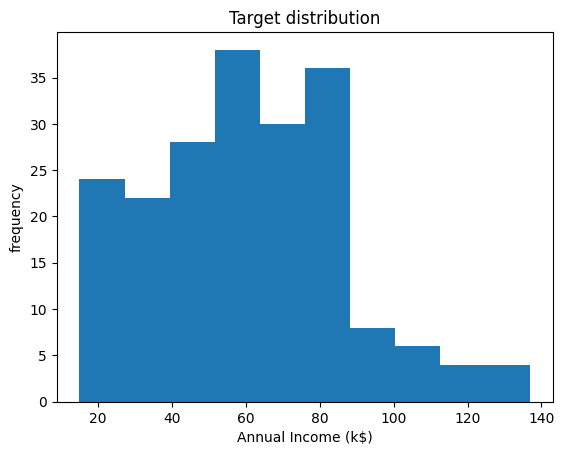

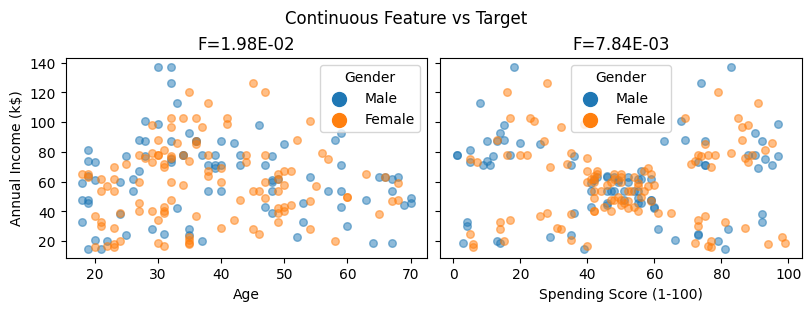

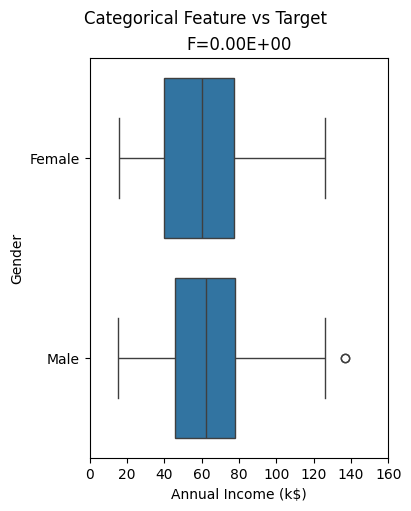

In [ ]:
dabl.plot(df, target_col= 'Annual Income (k$)')

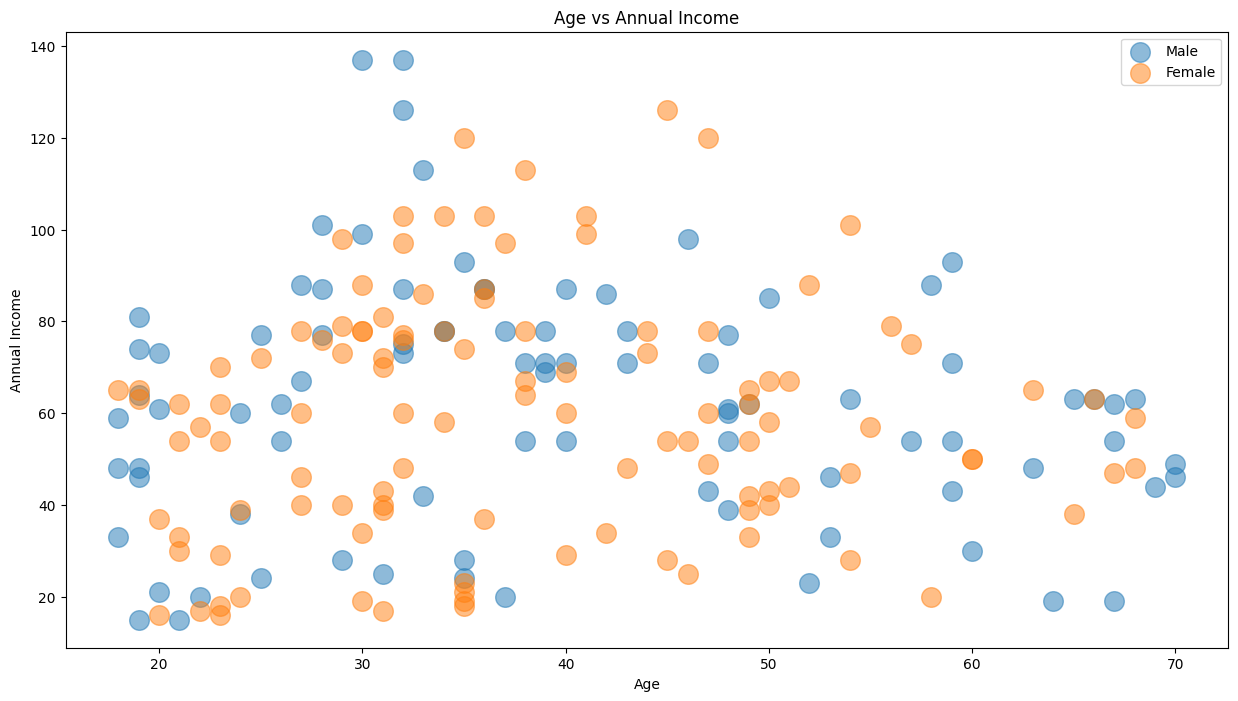

In [ ]:
plt.figure(figsize=(15,8))
for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)', data= df[df['Gender'] == gender], s= 200, alpha= 0.5, label= gender)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

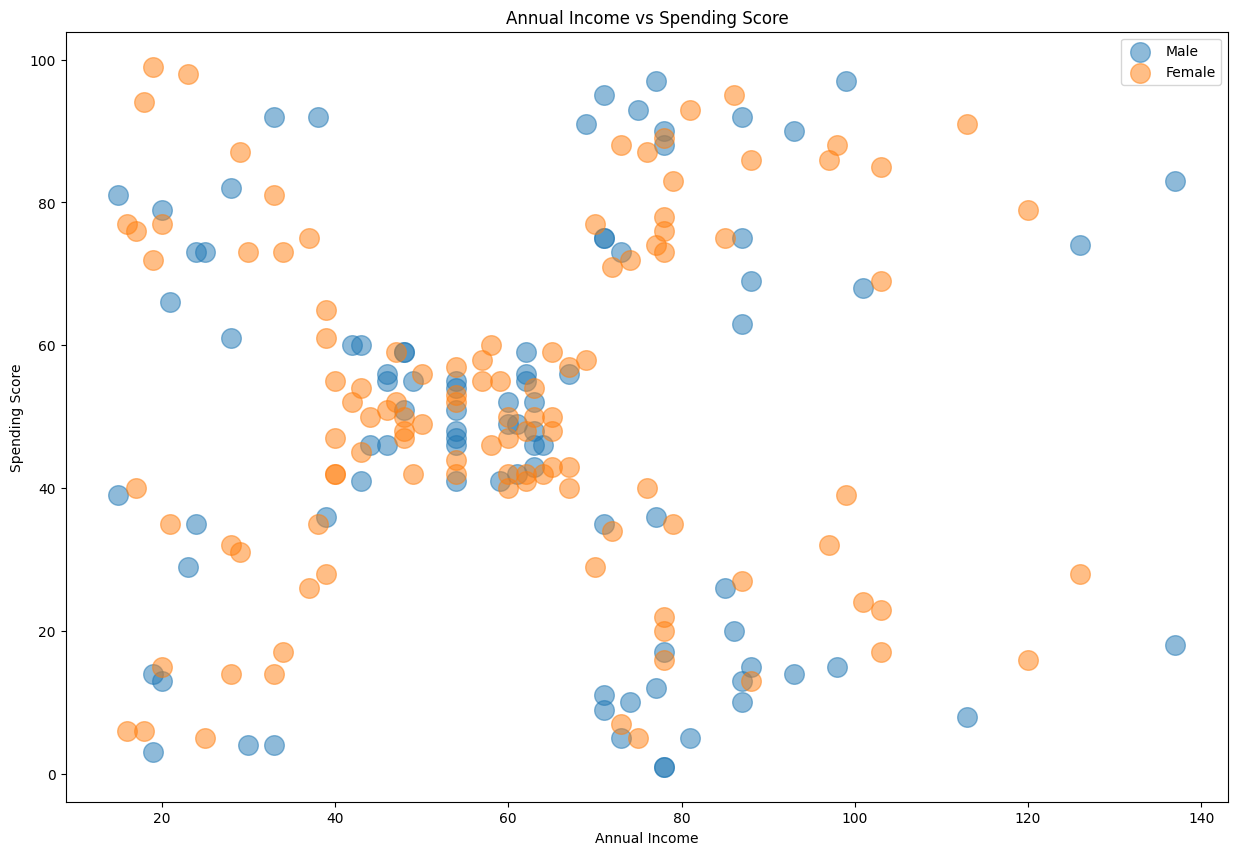

In [ ]:
plt.figure(figsize= (15,10))
for gender in ['Male', 'Female']:
  plt.scatter(x= 'Annual Income (k$)', y= 'Spending Score (1-100)', data= df[df['Gender'] == gender], s= 200, alpha= 0.5, label= gender)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [38]:
x = df.iloc[: , [3,4]].values

In [39]:
from sklearn.cluster import KMeans

In [43]:
k = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init= 'k-means++', random_state= 0)
  kmeans.fit(x)
  k.append(kmeans.inertia_)

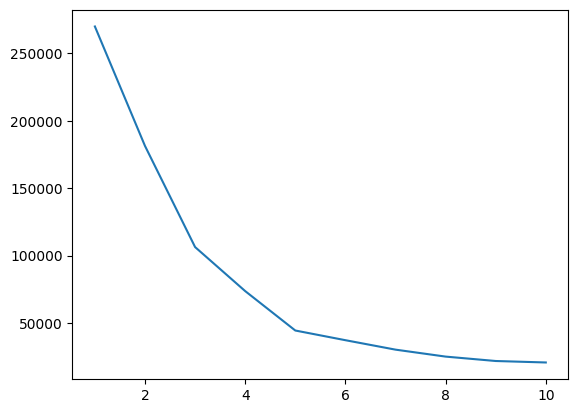

In [44]:
plt.plot(range(1,11), k)
plt.show()

In [51]:
model = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)
y_mns = model.fit_predict(x)

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

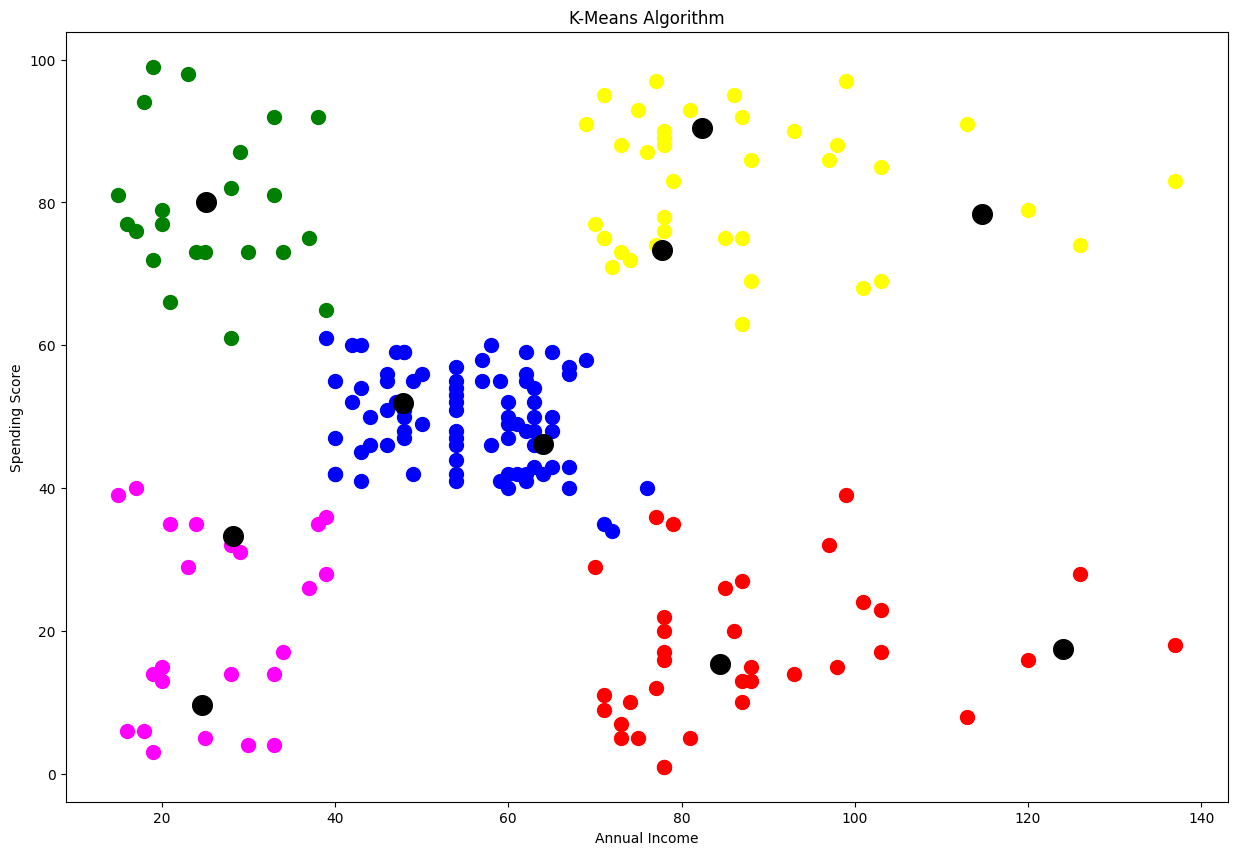

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_mns == 0,0], x[y_mns == 0,1], s= 100, c= 'Red', label= 'C1') # Cluster 1
plt.scatter(x[y_mns == 1,0], x[y_mns == 1,1], s= 100, c= 'Blue', label= 'C2') # Cluster 2
plt.scatter(x[y_mns == 2,0], x[y_mns == 2,1], s= 100, c= 'Yellow', label= 'C3') # Cluster 3
plt.scatter(x[y_mns == 3,0], x[y_mns == 3,1], s= 100, c= 'Green', label= 'C4') # Cluster 4
plt.scatter(x[y_mns == 4,0], x[y_mns == 4,1], s= 100, c= 'Magenta', label= 'C5') # Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 200, c= 'Black', label= 'Centroids')
plt.title('K-Means Algorithm')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()